In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import os

In [4]:
wisconsin = pd.read_csv("D:/Training/Academy/ML(Python)/Cases/Wisconsin/BreastCancer.csv", index_col=0)
le = LabelEncoder()
wisconsin['Class'] = le.fit_transform( wisconsin['Class'] )
le.classes_

array(['Benign', 'Malignant'], dtype=object)

In [5]:
X, y = wisconsin.drop('Class', axis=1), wisconsin['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                   stratify=y)

In [6]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.intercept_, lr.coef_

(array([-10.13685623]),
 array([[ 0.54707603,  0.04474491,  0.20952885,  0.19219542, -0.00722953,
          0.39656381,  0.60692755,  0.19441253,  0.53085196]]))

In [7]:
X_test.shape

(210, 9)

In [8]:
y_pred_prob = lr.predict_proba( X_test ) 
y_pred_prob

array([[9.98120767e-01, 1.87923285e-03],
       [9.98229749e-01, 1.77025092e-03],
       [1.96481629e-04, 9.99803518e-01],
       [9.82482033e-01, 1.75179672e-02],
       [9.94408267e-01, 5.59173308e-03],
       [5.51665724e-01, 4.48334276e-01],
       [2.05397996e-03, 9.97946020e-01],
       [9.76178351e-01, 2.38216491e-02],
       [9.98597104e-01, 1.40289575e-03],
       [9.96557412e-01, 3.44258849e-03],
       [9.99275706e-01, 7.24293521e-04],
       [9.98134279e-01, 1.86572114e-03],
       [5.46197681e-04, 9.99453802e-01],
       [9.89788038e-01, 1.02119620e-02],
       [9.89788038e-01, 1.02119620e-02],
       [9.98903064e-01, 1.09693596e-03],
       [1.16178478e-01, 8.83821522e-01],
       [9.98911740e-01, 1.08825963e-03],
       [9.98911740e-01, 1.08825963e-03],
       [9.90375598e-01, 9.62440163e-03],
       [9.96542540e-01, 3.45746032e-03],
       [7.31077129e-01, 2.68922871e-01],
       [4.51767821e-04, 9.99548232e-01],
       [4.26536006e-02, 9.57346399e-01],
       [9.958841

In [ ]:
y_pred_prob[:,1] # P(y==1)

array([1.87923285e-03, 1.77025092e-03, 9.99803518e-01, 1.75179672e-02,
       5.59173308e-03, 4.48334276e-01, 9.97946020e-01, 2.38216491e-02,
       1.40289575e-03, 3.44258849e-03, 7.24293521e-04, 1.86572114e-03,
       9.99453802e-01, 1.02119620e-02, 1.02119620e-02, 1.09693596e-03,
       8.83821522e-01, 1.08825963e-03, 1.08825963e-03, 9.62440163e-03,
       3.45746032e-03, 2.68922871e-01, 9.99548232e-01, 9.57346399e-01,
       4.11588442e-03, 5.59173308e-03, 9.99998235e-01, 1.07952819e-03,
       5.63207664e-03, 7.19895413e-03, 9.99099453e-01, 9.77390836e-01,
       3.05539560e-03, 3.34459321e-01, 9.99862321e-01, 1.77025092e-03,
       1.82897629e-02, 1.87923285e-03, 3.44258849e-03, 1.59027133e-02,
       1.02510133e-03, 9.96608883e-01, 5.93457820e-03, 2.46851514e-02,
       8.74190553e-01, 9.99824704e-01, 9.99848006e-01, 9.94128601e-01,
       3.12885599e-02, 9.93707964e-01, 1.77025092e-03, 8.71325370e-04,
       9.62440163e-03, 1.08825963e-03, 7.71901718e-03, 1.22763178e-02,
      

#### ROC-Curve

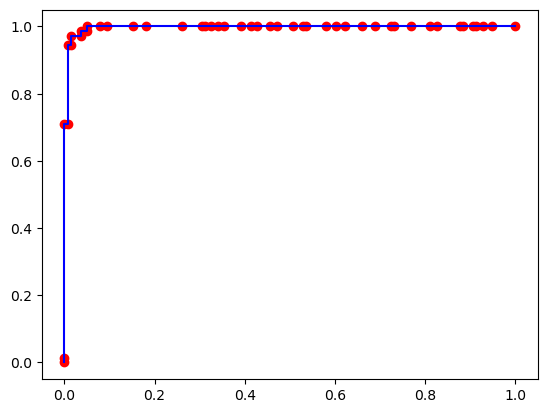

In [18]:
fpr, tpr, thres = roc_curve(y_test, y_pred_prob[:,1])
plt.scatter(fpr, tpr, c='red')
plt.plot(fpr, tpr, c='blue')
plt.show()

In [16]:
roc_auc_score(y_test, y_pred_prob[:,1])

0.9966787439613526

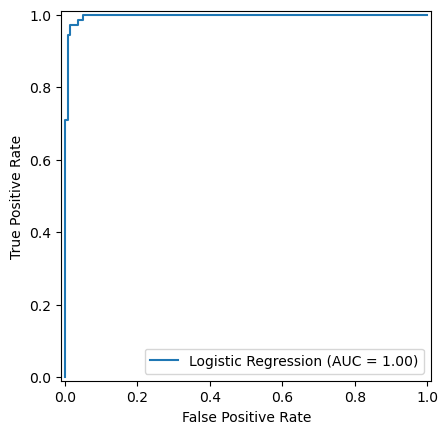

In [ ]:
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(y_test, y_pred_prob[:,1]) ,
                                  name='Logistic Regression')
disp.plot()
plt.show()

In [12]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[137   1]
 [  6  66]]


In [13]:
(137+66)/210

0.9666666666666667

In [14]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [15]:
lr = LogisticRegression(penalty='l2')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [16]:
lr = LogisticRegression(penalty=None)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [17]:
lr = LogisticRegression(solver='liblinear',penalty='l1')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [18]:
print( classification_report(y_test, y_pred) ) 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       138
           1       0.99      0.92      0.95        72

    accuracy                           0.97       210
   macro avg       0.97      0.95      0.96       210
weighted avg       0.97      0.97      0.97       210



#### Human resources analytics

In [19]:
hr = pd.read_csv("D:/Training/Academy/ML(Python)/Cases/human-resources-analytics/HR_comma_sep.csv")
X, y = hr.drop('left', axis=1), hr['left']
ohe = OneHotEncoder(drop='first', sparse_output=False).set_output(transform='pandas')
col_trnf = ColumnTransformer([('OHE',ohe, make_column_selector(dtype_include=object) )],
                             remainder='passthrough',
                             verbose_feature_names_out=False)
col_trnf = col_trnf.set_output(transform='pandas')
X = col_trnf.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25,
                                                   stratify=y)

In [21]:
lr = LogisticRegression(solver='liblinear',penalty='l1')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print( classification_report(y_test, y_pred) ) 

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3429
           1       0.64      0.37      0.47      1070

    accuracy                           0.80      4499
   macro avg       0.73      0.65      0.67      4499
weighted avg       0.78      0.80      0.78      4499



In [22]:
lr = LogisticRegression(solver='lbfgs',penalty='l2')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print( classification_report(y_test, y_pred) ) 

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3429
           1       0.64      0.40      0.49      1070

    accuracy                           0.80      4499
   macro avg       0.74      0.66      0.68      4499
weighted avg       0.79      0.80      0.79      4499



c:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
lr = LogisticRegression(solver='lbfgs',penalty=None)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print( classification_report(y_test, y_pred) ) 

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      3429
           1       0.66      0.41      0.51      1070

    accuracy                           0.81      4499
   macro avg       0.75      0.67      0.69      4499
weighted avg       0.79      0.81      0.79      4499



c:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Hyper-params Tuning

In [24]:
solvers = ['lbfgs','newton-cg','newton-cholesky','sag','saga']
penalties = ['l2', None]
scores = []
for s in solvers:
    for p in penalties:
        lr = LogisticRegression(penalty=p ,solver=s)
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        scores.append([s, p, accuracy_score(y_test, y_pred)])
df_scores = pd.DataFrame(scores, columns=['solver','penalty','score'])
df_scores.sort_values('score', ascending=False)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to

,solver,penalty,score
1,lbfgs,None,0.809069
0,lbfgs,l2,0.803956
2,newton-cg,l2,0.799511
3,newton-cg,None,0.799289
4,newton-cholesky,l2,0.799066
5,newton-cholesky,None,0.799066
8,saga,l2,0.757724
9,saga,None,0.757724
6,sag,l2,0.750611
7,sag,None,0.750389


In [25]:
solvers = ['lbfgs','newton-cg','newton-cholesky','sag','saga']
Cs = np.linspace(0.001, 15, 20)
penalties = ['l2', None]
scores = []
for s in solvers:
    for p in penalties:
        for c in Cs:
            lr = LogisticRegression(penalty=p ,solver=s, C=c)
            lr.fit(X_train, y_train)
            y_pred = lr.predict(X_test)
            scores.append([s, p,c, accuracy_score(y_test, y_pred)])
df_scores = pd.DataFrame(scores, columns=['solver','penalty','C','score'])
df_scores.sort_values('score', ascending=False)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to

,solver,penalty,C,score
15,lbfgs,l2,11.842316,0.813292
5,lbfgs,l2,3.948105,0.813070
2,lbfgs,l2,1.579842,0.812403
11,lbfgs,l2,8.684632,0.811291
12,lbfgs,l2,9.474053,0.810847
...,...,...,...,...
144,sag,None,3.158684,0.750611
153,sag,None,10.263474,0.750611
152,sag,None,9.474053,0.750611
151,sag,None,8.684632,0.750611


In [26]:
df_scores.shape

(200, 4)